# German Credit Data Insight & Prediction Model
by Theofilus Wisnu Handaru (wisnu.theofilus@gmail.com)

Data has become an important commodity in this era. However, just like other commodities, it will have a higher value if only those who have it could maximize using it. Therefore, this notebook will try to look deeper at the German Credit Data dataset to have good insight and could make a prediction model.

Machine learning always uses to help people in finding patterns in all things, however how big an impact made after using machine learning depended on how important those works. Therefore, I try to use it through predict in credit dataset, because credit or finance is something that could affect everyone. I get this dataset from **kaggle.com** that has been made by **Leonardo Ferreira**. 

To start this notebook, it important to import all the usefull libraries. It also better to import the dataset as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

%matplotlib inline

df = pd.read_csv('./german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


As seen above, this dataset contains data of credit customers in German. Even though it is called German Credit Data, it only contains around 1000 data. It's mean this dataset isn't perfect for representing real-life conditions, however this dataset good enough for learning purposes.

There are several columns included in this dataset, which are:
- **Unnamed: 0**         : show number order of the data
- **Age**                : show how age is the creditors
- **Sex**                : show what is the gender of the creditors
- **Job**                : show how many jobs the creditors working
- **Housing**            : show the creditors homeownership condition
- **Saving accounts**    : show the creditors investment condition
- **Checking account**   : show the creditors fund at the bank that easily drawn
- **Credit amount**      : show how much money they ask
- **Duration**           : show how long they want to finish payback the credit
- **Purpose**            : show what is the reason they ask for credit
- **Risk**               : show classifier if the creditors good or bad for the lender

## Cleaned it before use it

After the data use for the analysis has been gathered, it should be cleansed before it good to be used. There are several things to do in this step.

**Firstly, remove unimportant or duplicate columns**

In this dataset, **Unnamed: 0** column isn't useful, because it only contain order number which already shown in index of the dataframe. It's mean, we could erase it.

In [2]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


After removing the unuseful column, the data should be checked for any missing value.

In [3]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

From above it shows that there are some missing value in `Saving accounts` and `Checking account` columns. There are several idea to deal with missing value, it could be erased or filled. However, for this notebook it will be filled with the most common answer. 

For filling those missing value, it's better to check what type of data inside those columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


It shows that `Saving accounts` and `Checking account` columns have a categorical type. It means it can't be filled with mean value, however it could be filled with mode value from each columns.

In [5]:
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0],inplace=True)
df['Checking account'].fillna(df['Checking account'].mode()[0],inplace=True)

df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

The data has been cleansed and good to be used

## Look deeper through the data

To better knowing about the data could be used, it's better to look upon some vizualization of the data. Since the target from this notebook is finding risk, it's better to start from looking of the risk distribution.

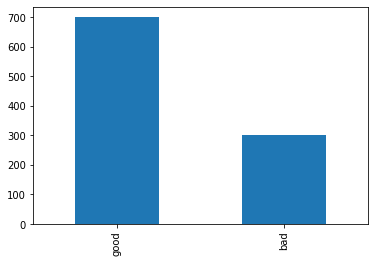

In [9]:
df['Risk'].value_counts().plot(kind='bar')

It shows that the distribution of the risk. There are more good creditors then bad creditors.

There are several columns or also called as features in this dataset, however for finding a good model from this dataset it's better to find the best features to be look upon.

One pair that interesting are `Sex` and `Purpose` features, because basically people have different purpose for something moreover from different gender. Here is the vizualisation of those two features distribution.

Text(0, 0.5, 'Count')

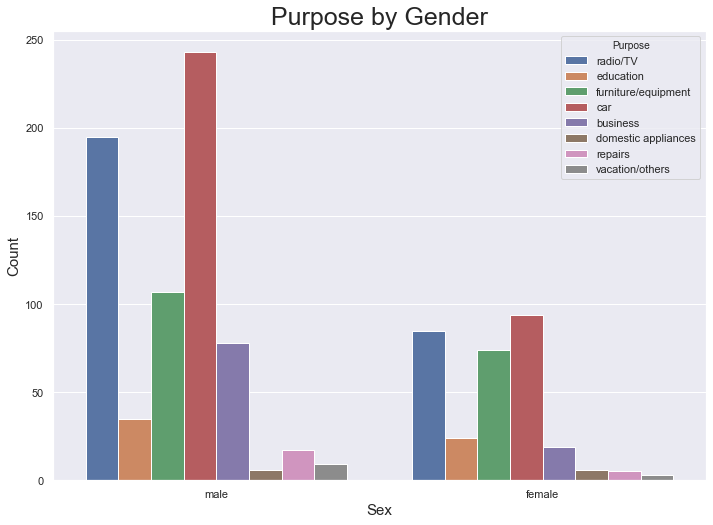

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=df['Sex'],hue='Purpose',data=df)

plt.title('Purpose by Gender',size = 25)
plt.xlabel('Sex',size = 15)
plt.ylabel('Count',size = 15)

The graph shows that there are several common purpose why people take a credit, those purpose are **car**, **radio/TV**, and **furniture/equipment**. However if look deeply at **business** and **education** there are different distribtion for male and female creditors. It shows that male tend to take credit for **business** however female tend to take credit for **education**.

Another interesting features pair to watch are `Purpose` and `Saving accounts`. It's interesting because those those features could show the different purpose of creditors from several economical status. Here is the vizualisation of those features.

Text(0, 0.5, 'Count')

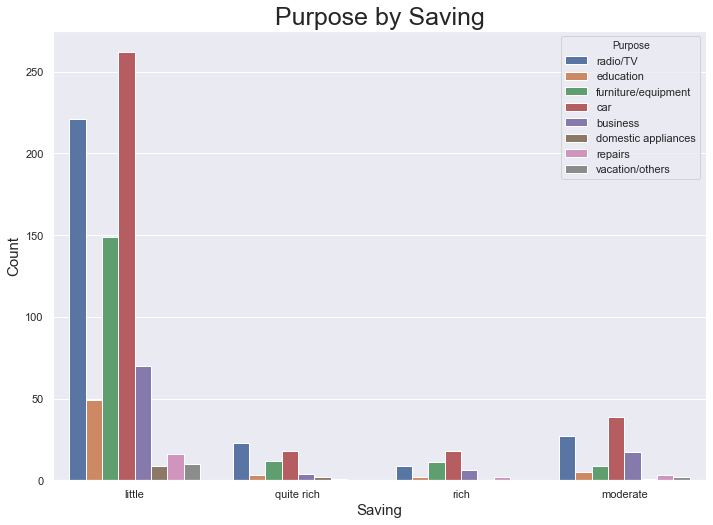

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=df['Saving accounts'],hue='Purpose',data=df)

plt.title('Purpose by Saving',size = 25)
plt.xlabel('Saving',size = 15)
plt.ylabel('Count',size = 15)

It shows that most of creditors in this dataset are from `little saving accounts`, it means the more savings people have it less likely for them to take a credit. This graph also shows that **car** are the most reason why creditors take a credit except for `quite rich saving accounts`, those creditors most purpose to take a credit are for **radio/TV** purpose.

If we look back at the `Risk` features, we could assume that several features could affect it. Let's begin to look upon how the `Risk` distribution from how many `Jobs` the creditors take.

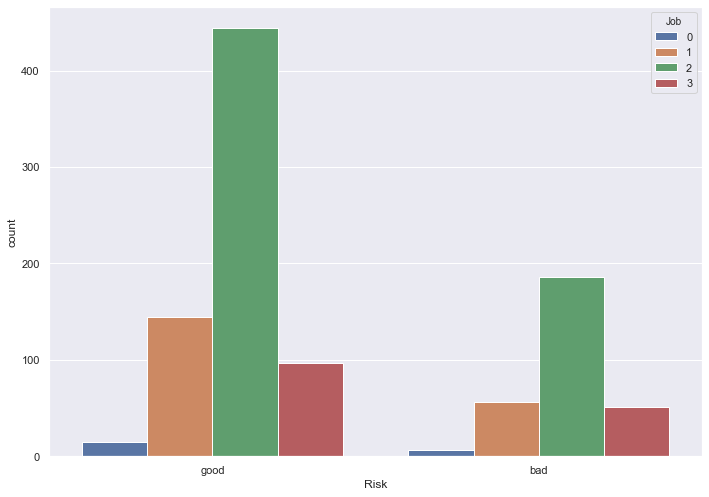

In [12]:
sns.countplot(x=df['Risk'],hue='Job',data=df)

It shows that most of creditors take 2 jobs even though the distribution for the `Risk` is quite the same.

Another assumption could be from `Housing` and `Risk`. Here is the visualization of those features.

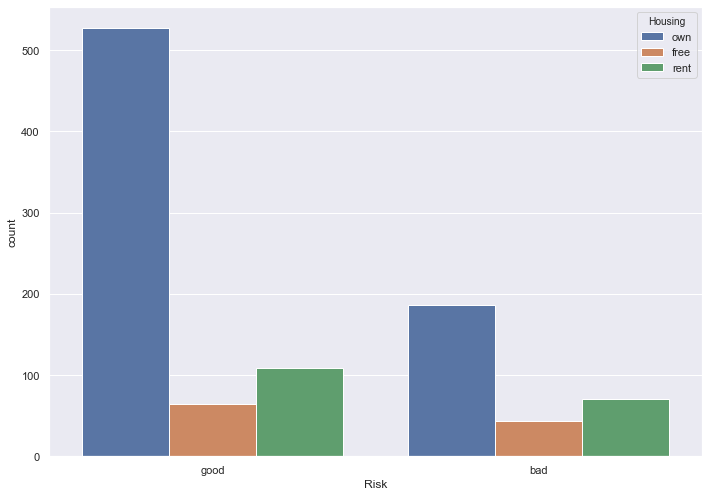

In [13]:
sns.countplot(x=df['Risk'],hue='Housing',data=df)

It shows that most of the creditors, in spite of the `Risk` distribution, owning there house. There are almost no different of distribution in `good Risk` or `bad Risk`.

The next features that also interesting to look upon and compared to the `Risk` is `Duration` feature. Here is the visualization of those features.

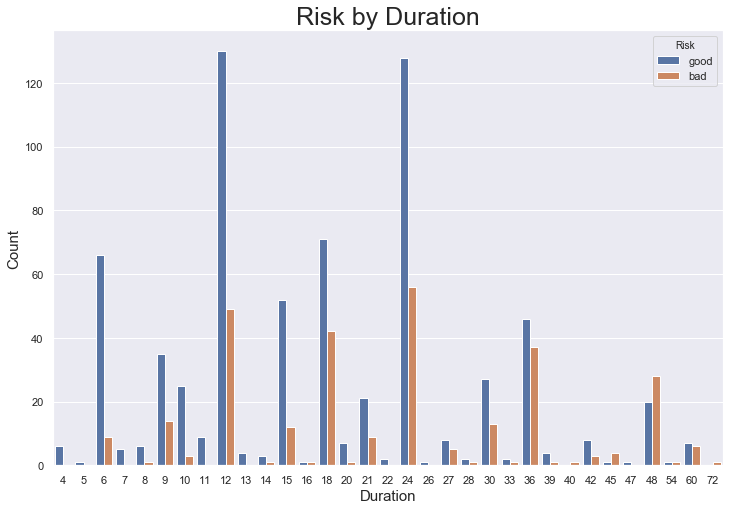

In [14]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=df['Duration'],hue='Risk',data=df)

plt.title('Risk by Duration',size = 25)
plt.xlabel('Duration',size = 15)
plt.ylabel('Count',size = 15)

plt.show()

It shows that most of creditors take the credit at 12 and 24 `Duration`. Almost every duration have better `good Risk` rather than `bad Risk`, however for `Duration` more than 42, there are few which have higher `bad Risk` than `good Risk` such as 45 and 48. It could be concluded that most of the time, creditors will be having `good Risk` if the `Duration` are less than 42.

## Then which features are the best to be used in this model

To answer those question there are no exact answer, even for the most experience engineer. However, there are several steps that could be done to finding it.

### It is good for looking the features correlation with the target

Correlation is one good way to finding if the features good enough to be used, the bigger correlation those features have, then it most likely more usable to the model, even for the negative one.

However, since correlation only works with numerical type, then it should seperate categorcal type to be used as numerical. One way to do it is using One Hot Encoder.

In [16]:
# make a different dataframe to be used for this step
df_ml = df

# one hot encoding for categorical columns
df_ml = pd.get_dummies(df_ml, columns=['Sex', 'Housing','Saving accounts','Checking account','Purpose','Risk'])

df_ml.drop(columns=['Risk_bad'],inplace=True)

df_ml.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,2,1169,6,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,45,2,7882,42,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


Table above shows how is the result to split categorical features using One Hot Encorder. We remove the `Risk_bad` because it redundant to be used with `Risk_good`. Then, the data is good to be used for correlation test.

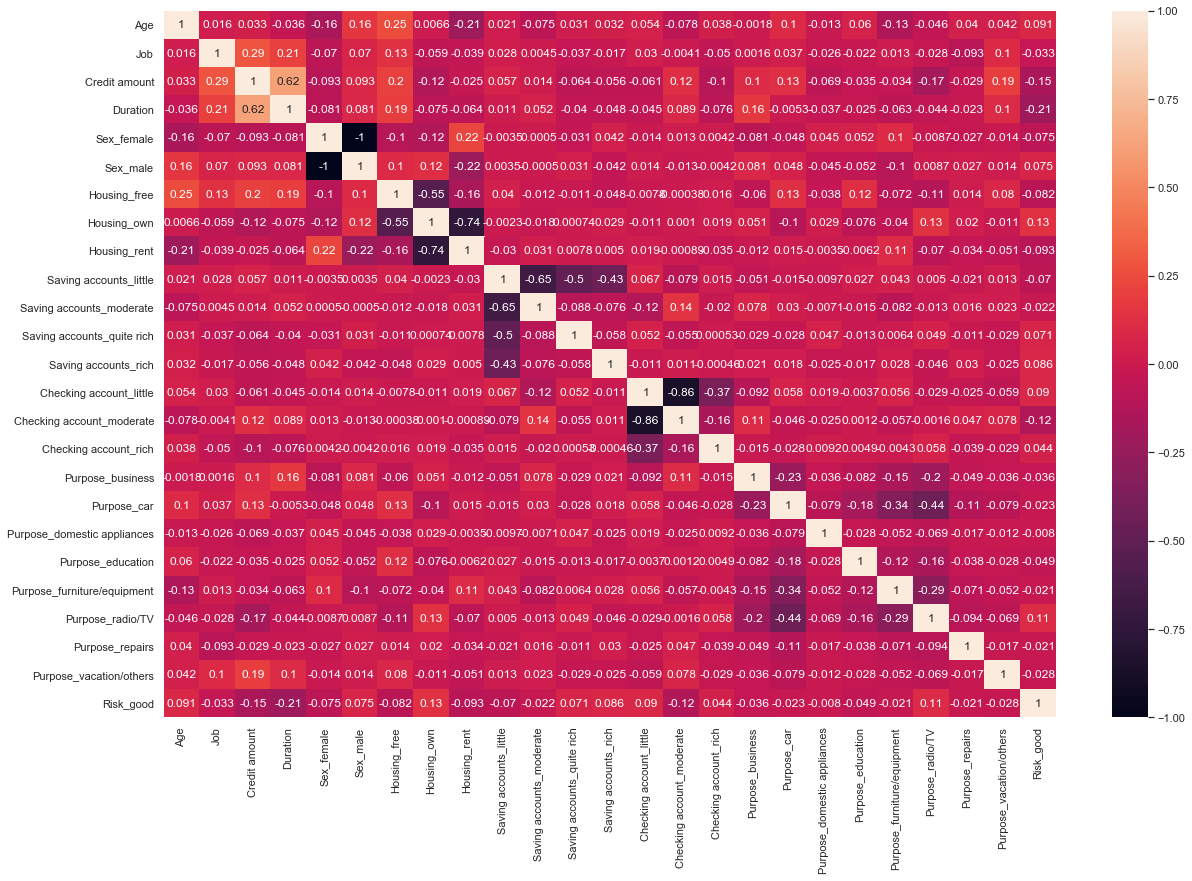

In [17]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(df_ml.corr(),annot=True)

This heatmap shows how the correlation for each features. If we look closely to those features correlation to `Risk_good`, then it shows that no features have very high correlation to the `Risk`. Then, I assume that it's better to **choose some features that have corrrelation more than 0.1.**

Those selected features are **Purpose, Housing, Duration, and Credit Ammount**

Then it's better to resellect the dataset used in this modeling using only selected features.

In [20]:
df_ml = df
df_ml = df_ml.drop(columns=['Sex','Job','Saving accounts','Checking account'])

# one hot encoding untuk kolom yang bersifat kategorik
df_ml = pd.get_dummies(df_ml, columns=['Housing','Purpose','Risk'])
df_ml = df_ml.drop(columns=['Risk_bad'])

df_ml.head()

,Age,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,1169,6,0,1,0,0,0,0,0,0,1,0,0,1
1,22,5951,48,0,1,0,0,0,0,0,0,1,0,0,0
2,49,2096,12,0,1,0,0,0,0,1,0,0,0,0,1
3,45,7882,42,1,0,0,0,0,0,0,1,0,0,0,1
4,53,4870,24,1,0,0,0,1,0,0,0,0,0,0,0


## Then how to make the model of it

There are many model that have been made for machine learning purpose, some of them having benefit that others haven't. However, for this notebook, there will be 2 model use, which are **KNearest Neighbors and Random Forest.**

Those 2 type of model will be compared by the score of the model made.

### But first, prepare the Train-Test data

In spite which model used, train and test data will be the same. This is important to make sure those 2 models could be compared equally.

It start by deviding the data.

In [43]:
# Reprocess the dataset with out One Hot Encoder

df_ml = df[['Purpose', 'Housing', 'Duration', 'Credit amount','Risk']]

# one hot encoding untuk kolom yang bersifat kategorik
df_ml = pd.get_dummies(df_ml, columns=['Risk'])
df_ml = df_ml.drop(columns=['Risk_bad'])
df_ml.head()

,Purpose,Housing,Duration,Credit amount,Risk_good
0,radio/TV,own,6,1169,1
1,radio/TV,own,48,5951,0
2,education,own,12,2096,1
3,furniture/equipment,free,42,7882,1
4,car,free,24,4870,0


In [44]:
# Make Train-Test deviding process for X dan Y
from sklearn.model_selection import train_test_split

# shuffle split
X = df_ml.drop(columns='Risk_good')
y = df_ml['Risk_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

It using `test_size` 0.2 which means that the seperation of train data and test data are 80% and 20%.

### K Nearest Neighbors

These are the steps to make model using K Nearest Neighbors (KNN)

In [45]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 

In [46]:
# step 2 menyiapkan pipeline
# buat pipeline untuk masing-masing jenis data (numerik dan kategorik)

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # imputasi data kosong
    ('scaler', MinMaxScaler()) # untuk scaling data
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # imputasi data kosong menggunakan modus
    ('encoder', OneHotEncoder()) # untuk membuat one hot encoding
    
])

In [47]:
from sklearn.compose import ColumnTransformer

# pipeline digabungkan ke dalam 1 transformer
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['Duration', 'Credit amount']), # listing kolom mana saja yang termasuk numerik
    ('categoric', categorical_pipeline, ['Purpose', 'Housing']) # listing kolom mana saja yang termasuk kategorik
])


In [48]:
# Membungkus Pipeline didalam pipeline
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('prep', preprocessor), # step pertama adalah semua data dimasukkan ke dalam preprocessor
    ('algo', KNeighborsClassifier()) # step kedua adalah mengaplikasikan KNN pada data
])

In [49]:
# Menentukan parameter KNear neighbors
from sklearn.model_selection import GridSearchCV

parameter = {
    "algo__n_neighbors": range(1, 11, 2), #tuning tetangga terdekat
    "algo__weights": ['uniform', 'distance'], #tuning bobot jarak
    "algo__p": [1, 2, 3] #tuning perhitungan distance
} 

# total kombinasi tuning 5 neighbors x 2 weights x 3 p = 30 percobaan
# misal kita menggunakan 3 CV berarti akan ada 30 percobaan x 3 = 90 percobaan

# Memasukan kedalam model
model_knn = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model_knn.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                        

In [50]:
# melihat performance terhadap data train dan data test
print(model_knn.score(X_train, y_train), model_knn.score(X_test, y_test))

0.74875 0.635


Using KNN model, it shows that score of `train` is 0,75 and score of `test` is 0,63`.

### Random Forest

These are steps for using Random Forest model

In [33]:
# Prepare Train Test to change categorical to numerical

df_rfc = df_ml
df_rfc.head()

,Purpose,Housing,Duration,Credit amount,Risk_good
0,radio/TV,own,6,1169,1
1,radio/TV,own,48,5951,0
2,education,own,12,2096,1
3,furniture/equipment,free,42,7882,1
4,car,free,24,4870,0


In [34]:
# one hot encoding untuk kolom yang bersifat kategorik
df_rfc = pd.get_dummies(df_rfc, columns=['Housing','Purpose'])

# step 1 : shuffle split
X = df_rfc.drop(columns='Risk_good')
y = df_rfc['Risk_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 13), (200, 13), (800,), (200,))

In [35]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators=10) # n estimator 10 karena jumlah data hanya 1000
model_RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# melihat performance terhadap data train dan data test
print(model_RFC.score(X_train, y_train), model_RFC.score(X_test, y_test))

0.9775 0.65


Using Random Forest model, it shows that score of `train` is 0,97 and score of `test` is 0,65`.